# 음성의 spectral constrast를 관찰하는 프로그램
이건 되게 쓸모 있을 듯  

In [7]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [8]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [9]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


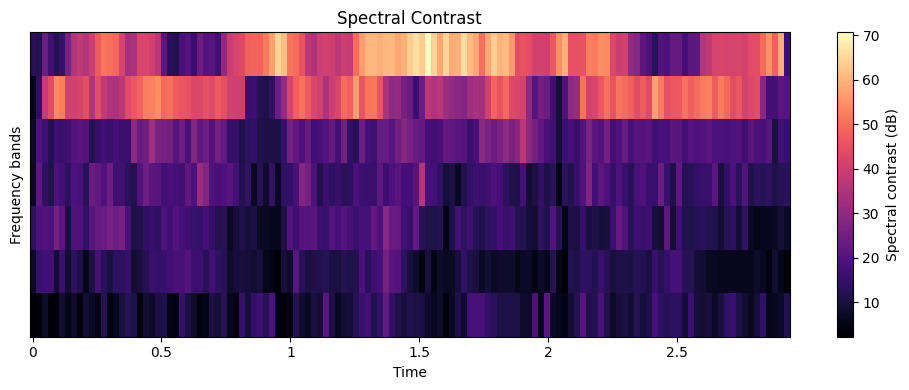

In [23]:
# 오디오 파일 로드
filename = './train/JFAWUOGJ.ogg'
y, sr = librosa.load(filename)

# n_fft와 hop_length 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정

n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

# Spectral contrast 계산
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Spectral contrast 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar(label='Spectral contrast (dB)')
plt.ylabel('Frequency bands')
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

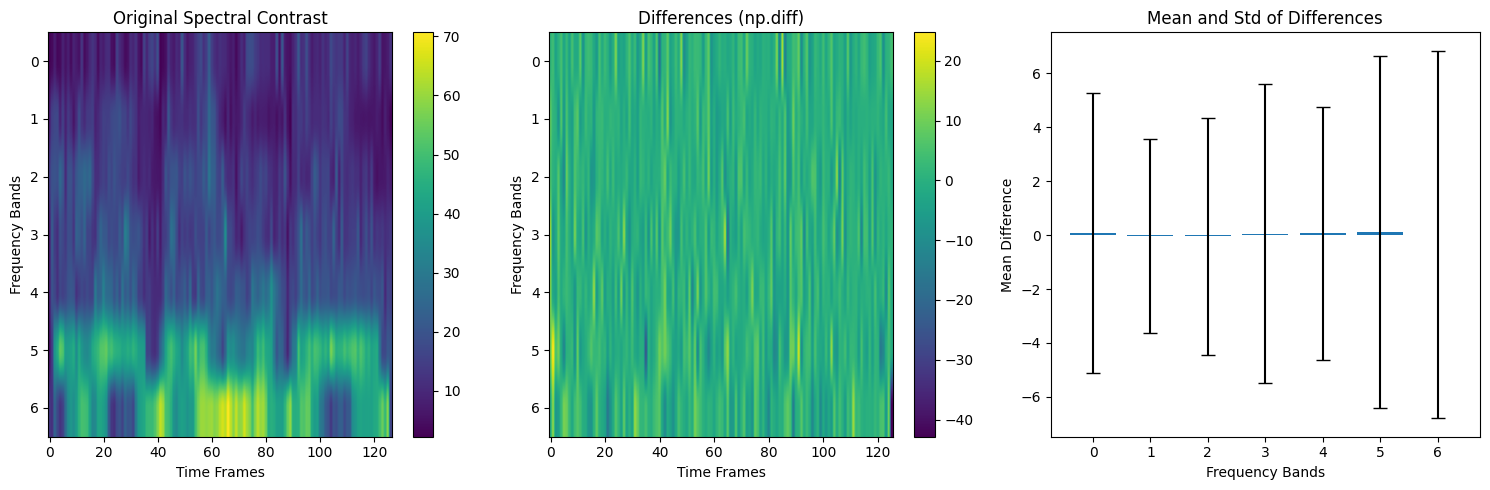

mean_diff: [ 0.07557733 -0.03191082 -0.04956385  0.05464176  0.06191047  0.11912812
  0.02004506]
std_diff: [5.17724722 3.59437328 4.38213687 5.53008429 4.67685598 6.51386087
 6.81600223]


In [27]:
# 오디오 파일 로드
filename = './train/JFAWUOGJ.ogg'
y, sr = librosa.load(filename)

# n_fft와 hop_length 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정

n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

# Spectral contrast 계산
S = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, n_fft=n_fft, hop_length=hop_length)

# 1. 원본 데이터 시각화
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(S, aspect='auto', cmap='viridis')
plt.title('Original Spectral Contrast')
plt.colorbar()
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bands')

# 2. diff 계산 및 시각화
diff = np.diff(S, axis=1)
plt.subplot(132)
plt.imshow(diff, aspect='auto', cmap='viridis')
plt.title('Differences (np.diff)')
plt.colorbar()
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bands')

# 3. mean_diff와 std_diff 계산 및 시각화
mean_diff = np.mean(diff, axis=1)
std_diff = np.std(diff, axis=1)

plt.subplot(133)
plt.bar(range(len(mean_diff)), mean_diff, yerr=std_diff, capsize=5)
plt.title('Mean and Std of Differences')
plt.xlabel('Frequency Bands')
plt.ylabel('Mean Difference')

plt.tight_layout()
plt.show()

print("mean_diff:", mean_diff)
print("std_diff:", std_diff)

In [18]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

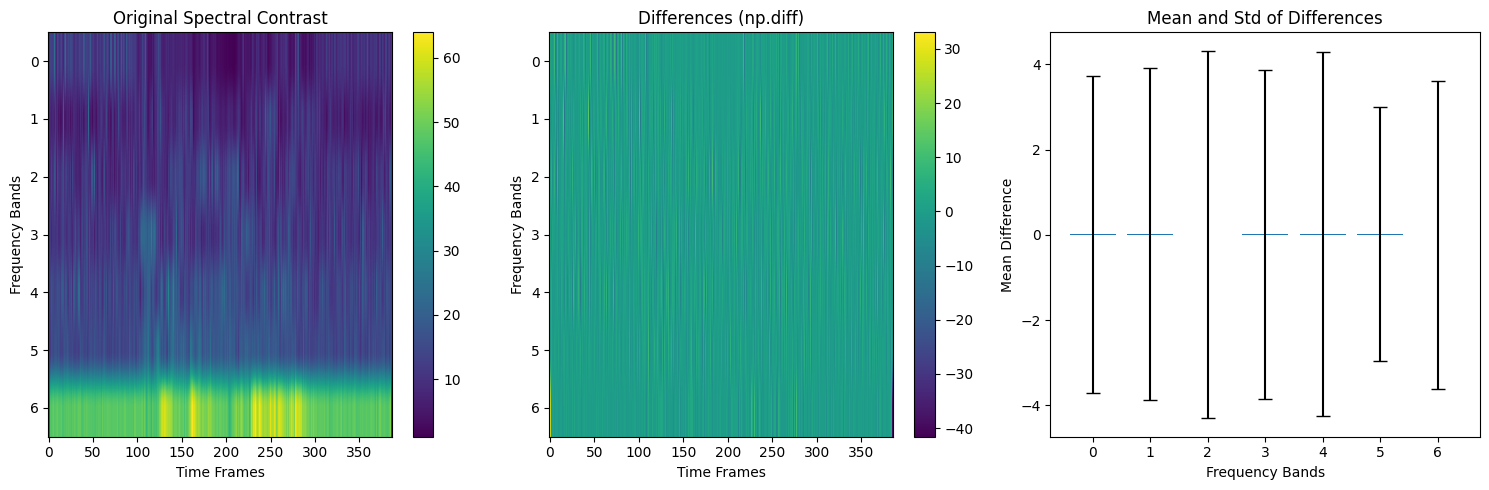

mean_diff: [ 0.01763238  0.02509898  0.00877181  0.01301235  0.01912339  0.01411455
 -0.00905965]
std_diff: [3.71512168 3.89299146 4.31143692 3.85782994 4.26061648 2.98225374
 3.61471407]


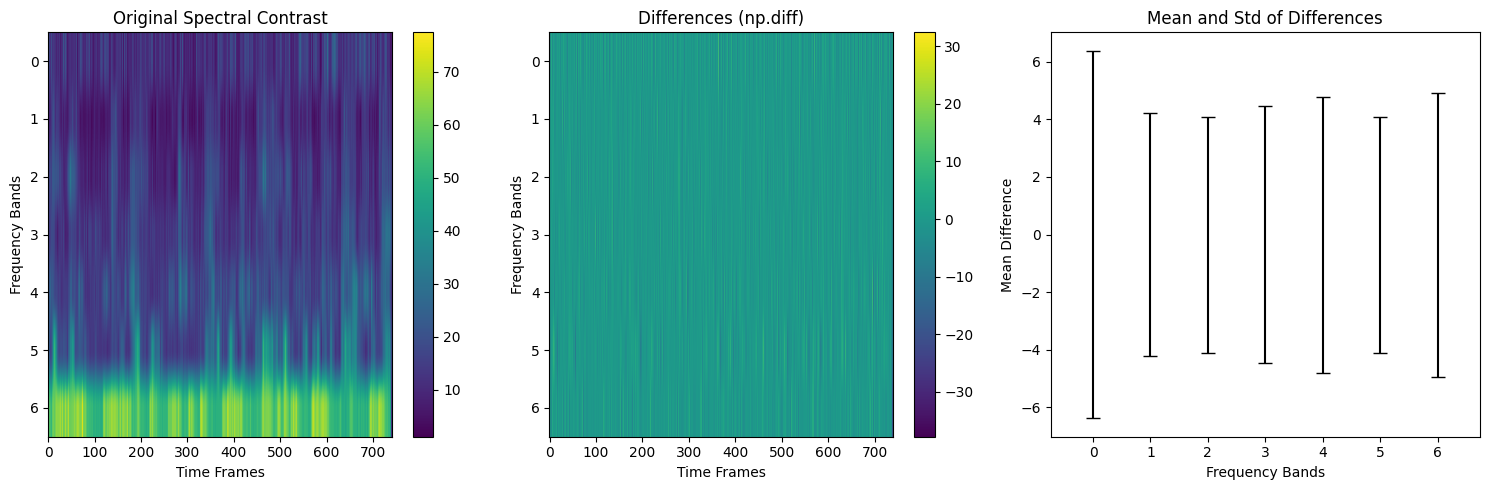

mean_diff: [ 0.00222728 -0.00392162 -0.00694303  0.00303918 -0.01589229 -0.0094111
 -0.01857806]
std_diff: [6.38284883 4.22611333 4.09952137 4.44750716 4.78734001 4.09649078
 4.93616561]


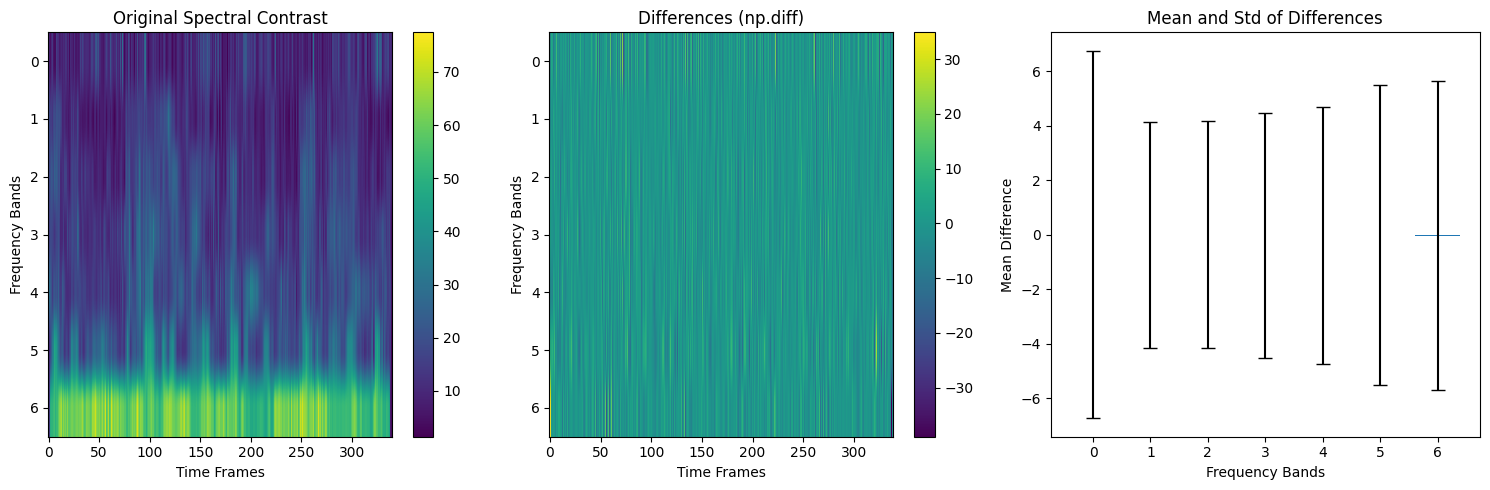

mean_diff: [ 0.01051927 -0.00511305  0.00622401 -0.02113658 -0.0168597  -0.00214724
 -0.02883234]
std_diff: [6.73958946 4.15769455 4.1731789  4.4856432  4.71763406 5.48850301
 5.65859508]


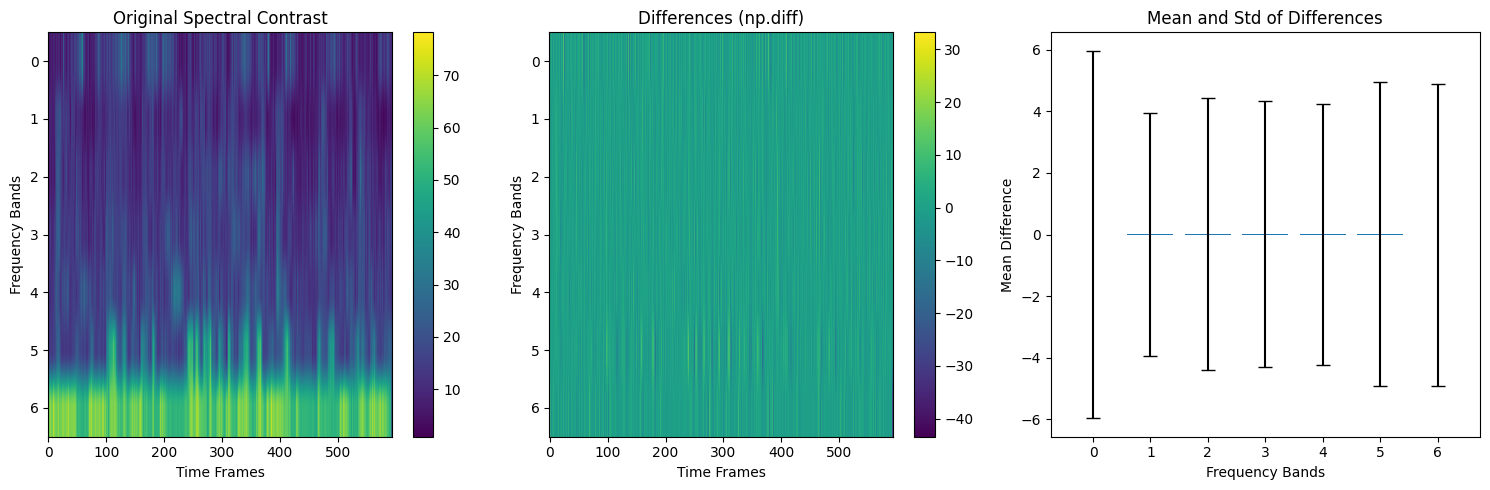

mean_diff: [ 0.00077756  0.00985105  0.01966316  0.02463006  0.00354093  0.0127915
 -0.01988196]
std_diff: [5.96862679 3.94300035 4.42714871 4.32096806 4.22879818 4.94323441
 4.89709636]


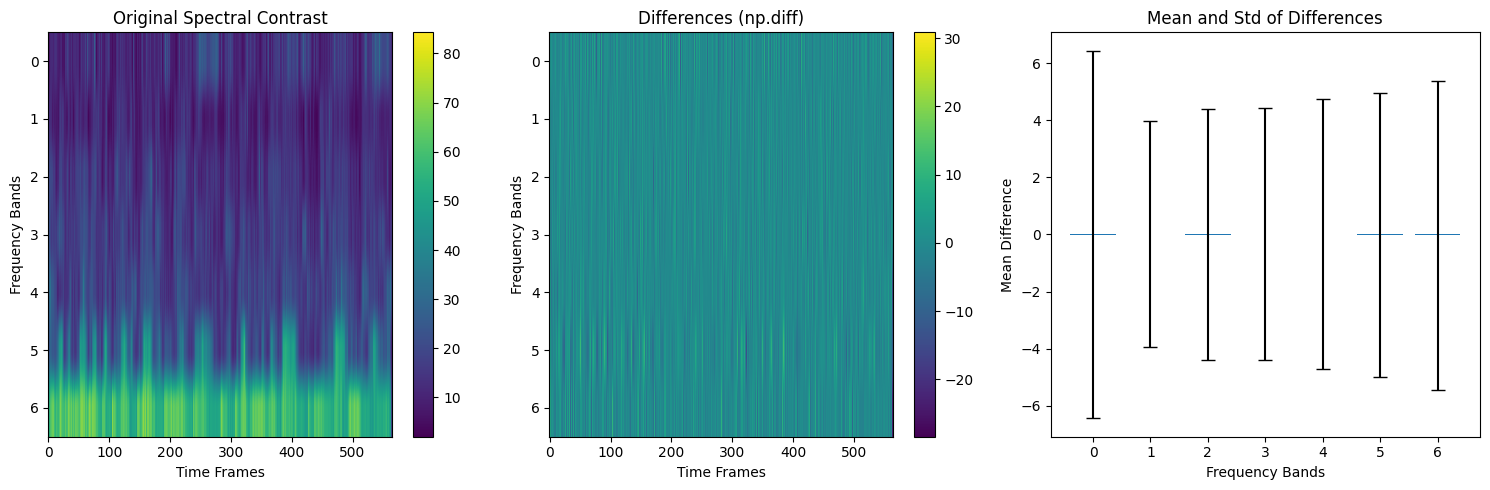

mean_diff: [-0.00154066  0.00573307 -0.00362889  0.0163687   0.000563   -0.02155208
 -0.01959879]
std_diff: [6.43507286 3.96050109 4.39915761 4.39930892 4.72523364 4.96660236
 5.41032814]


In [28]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # Spectral contrast 계산
    S = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, n_fft=n_fft, hop_length=hop_length)

    # 1. 원본 데이터 시각화
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(S, aspect='auto', cmap='viridis')
    plt.title('Original Spectral Contrast')
    plt.colorbar()
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bands')

    # 2. diff 계산 및 시각화
    diff = np.diff(S, axis=1)
    plt.subplot(132)
    plt.imshow(diff, aspect='auto', cmap='viridis')
    plt.title('Differences (np.diff)')
    plt.colorbar()
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bands')

    # 3. mean_diff와 std_diff 계산 및 시각화
    mean_diff = np.mean(diff, axis=1)
    std_diff = np.std(diff, axis=1)

    plt.subplot(133)
    plt.bar(range(len(mean_diff)), mean_diff, yerr=std_diff, capsize=5)
    plt.title('Mean and Std of Differences')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Mean Difference')

    plt.tight_layout()
    plt.show()

    print("mean_diff:", mean_diff)
    print("std_diff:", std_diff)

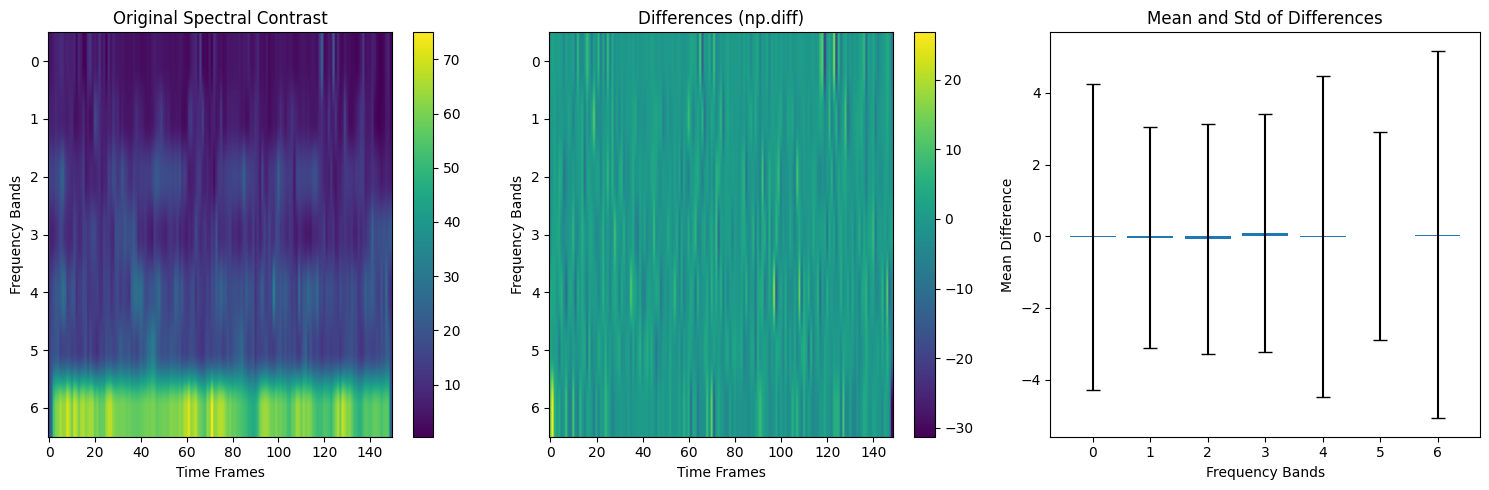

mean_diff: [-0.02136463 -0.03557296 -0.07626878  0.08092358 -0.00883256  0.00923516
  0.04783137]
std_diff: [4.2600535  3.09616261 3.20605976 3.32267878 4.48973879 2.89977393
 5.12835837]


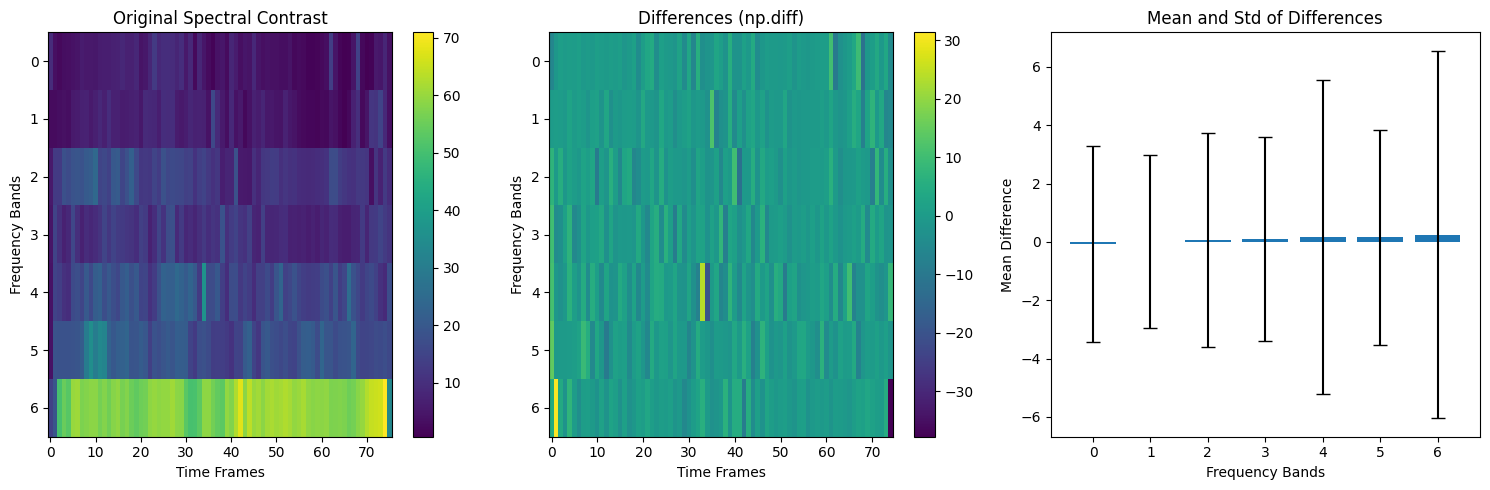

mean_diff: [-0.07695913  0.01191791  0.0566477   0.08819756  0.17739946  0.15522658
  0.25111231]
std_diff: [3.35186556 2.96881473 3.66523916 3.4982939  5.38125832 3.68305796
 6.30240533]


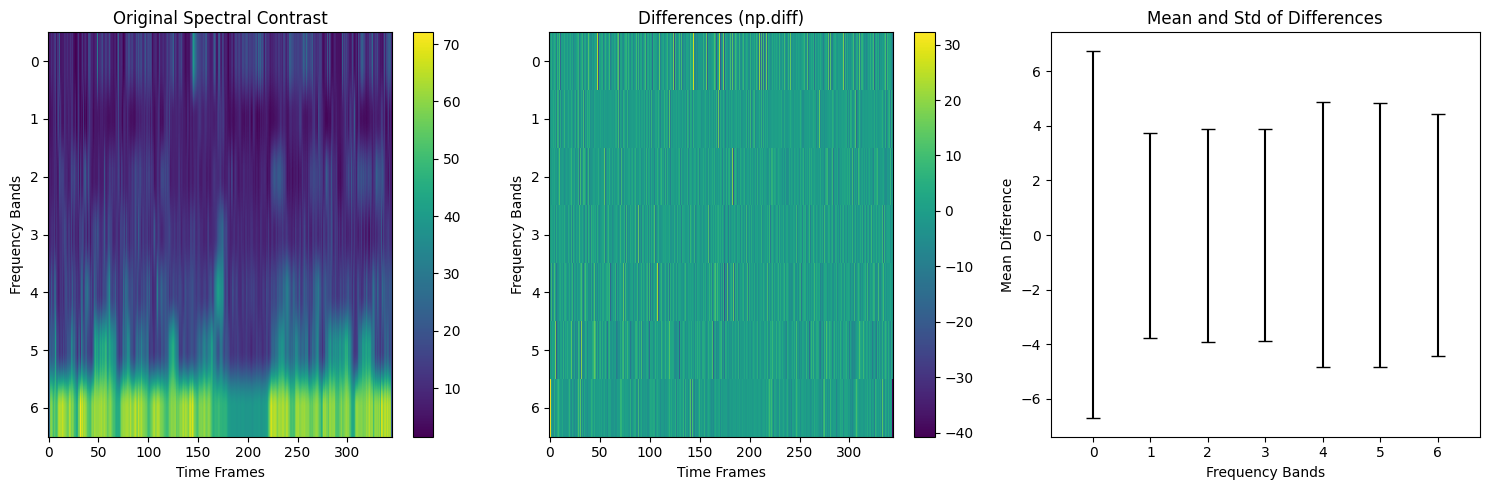

mean_diff: [ 0.01993644 -0.00483979 -0.00603896 -0.0025467   0.00919353  0.00199422
  0.01109146]
std_diff: [6.73038112 3.75296956 3.89704356 3.8861238  4.84891232 4.82370962
 4.43433573]


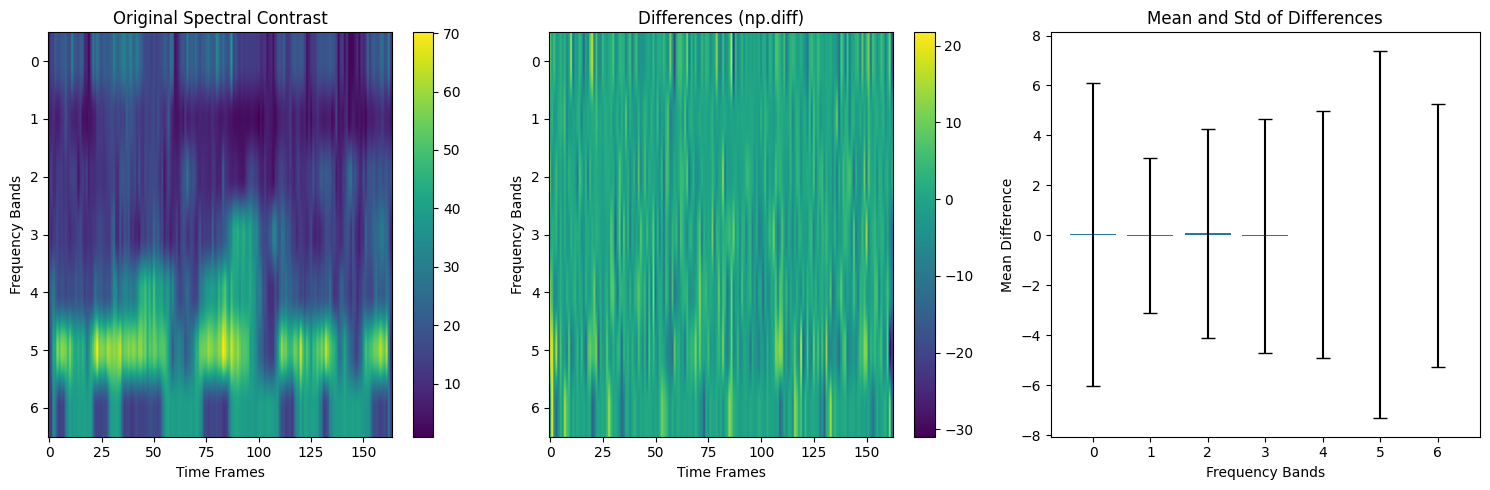

mean_diff: [ 0.03825553 -0.01891869  0.08407744 -0.01430678  0.02783368  0.0304741
 -0.00113765]
std_diff: [6.06549936 3.09478484 4.18761334 4.68725412 4.93866906 7.36143419
 5.2662351 ]


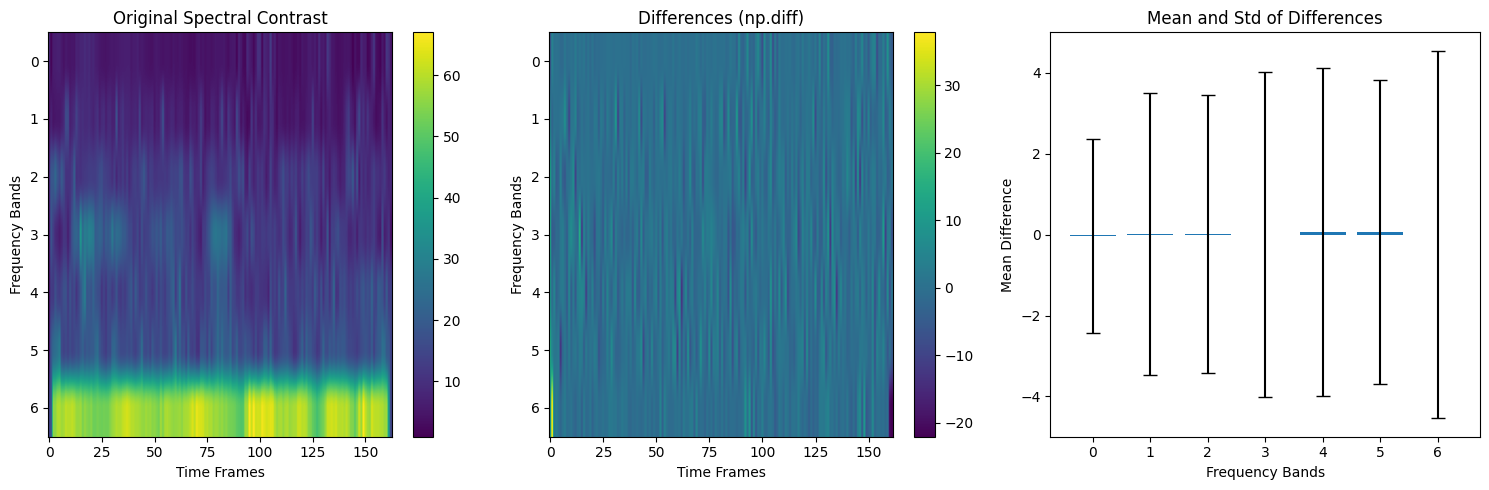

mean_diff: [-0.02452631  0.02114787  0.01770254  0.00493991  0.06485511  0.0633211
  0.00488549]
std_diff: [2.39995312 3.4840984  3.43232427 4.00827359 4.06484628 3.76625189
 4.54518488]


In [29]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # Spectral contrast 계산
    S = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, n_fft=n_fft, hop_length=hop_length)

    # 1. 원본 데이터 시각화
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(S, aspect='auto', cmap='viridis')
    plt.title('Original Spectral Contrast')
    plt.colorbar()
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bands')

    # 2. diff 계산 및 시각화
    diff = np.diff(S, axis=1)
    plt.subplot(132)
    plt.imshow(diff, aspect='auto', cmap='viridis')
    plt.title('Differences (np.diff)')
    plt.colorbar()
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bands')

    # 3. mean_diff와 std_diff 계산 및 시각화
    mean_diff = np.mean(diff, axis=1)
    std_diff = np.std(diff, axis=1)

    plt.subplot(133)
    plt.bar(range(len(mean_diff)), mean_diff, yerr=std_diff, capsize=5)
    plt.title('Mean and Std of Differences')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Mean Difference')

    plt.tight_layout()
    plt.show()

    print("mean_diff:", mean_diff)
    print("std_diff:", std_diff)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

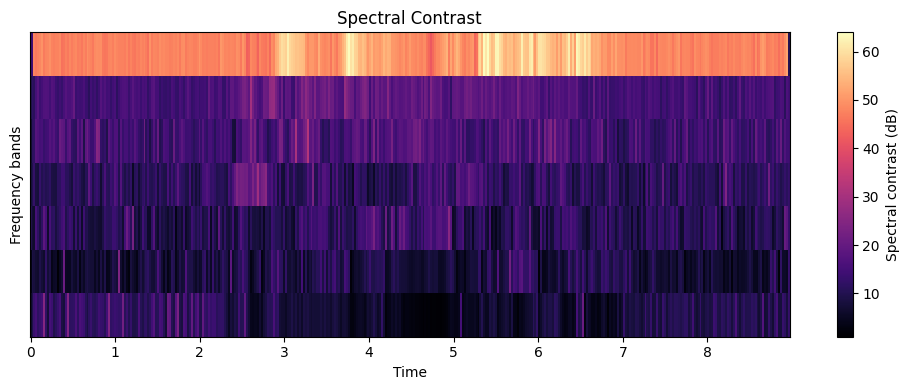

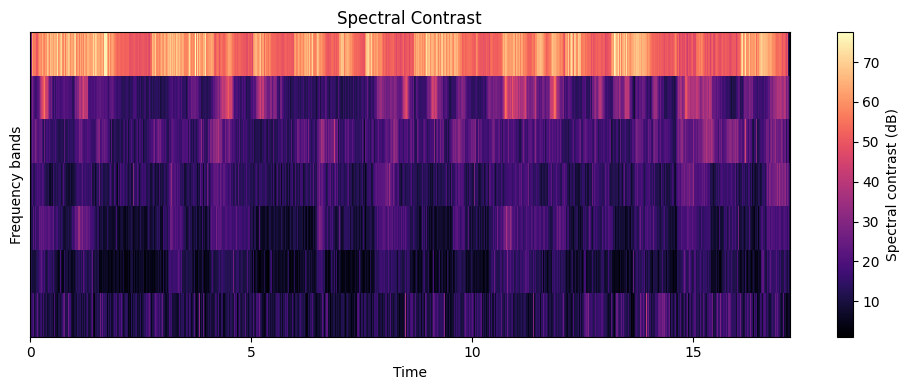

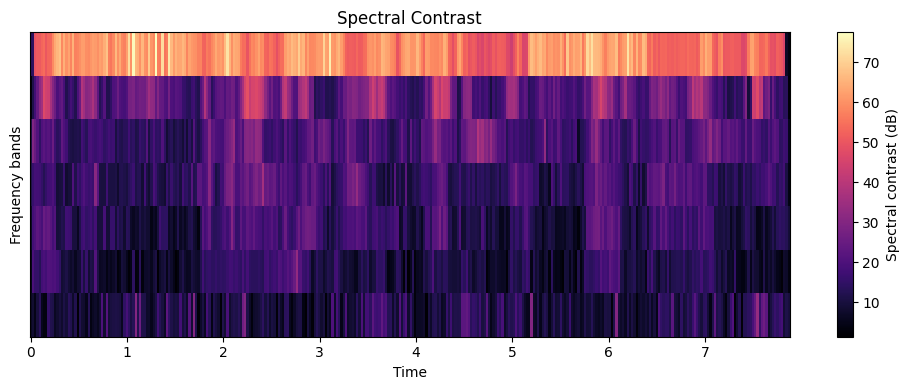

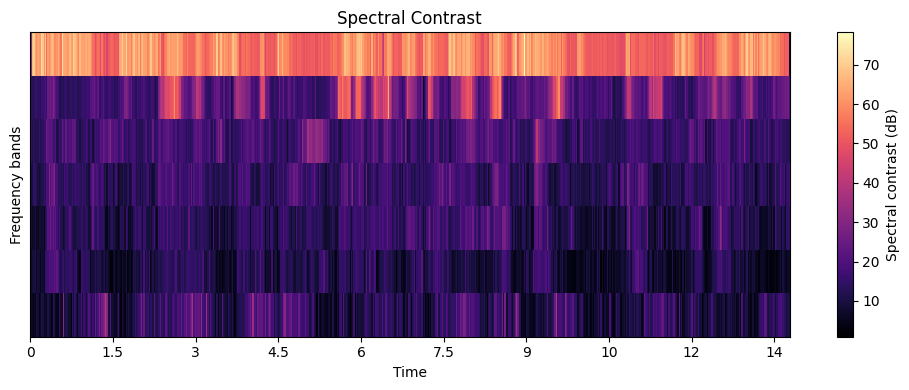

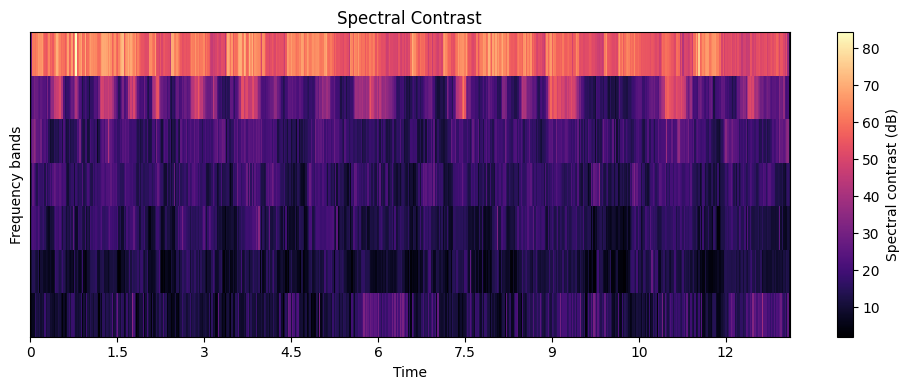

In [19]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # Spectral contrast 계산
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Spectral contrast 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar(label='Spectral contrast (dB)')
    plt.ylabel('Frequency bands')
    plt.title('Spectral Contrast')
    plt.tight_layout()
    plt.show()

## train fake

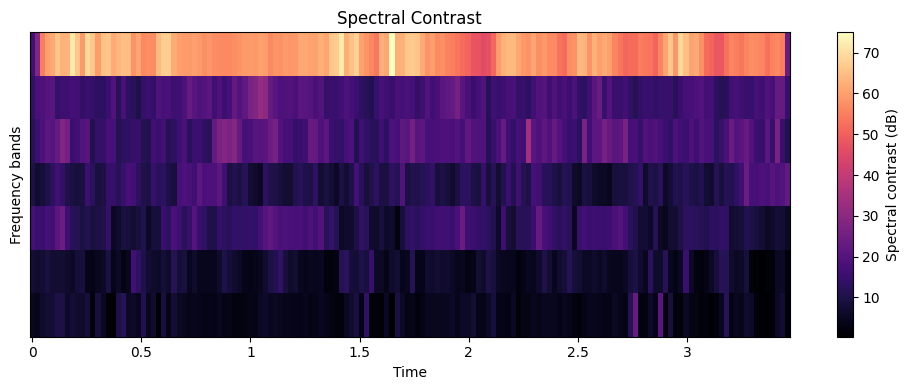

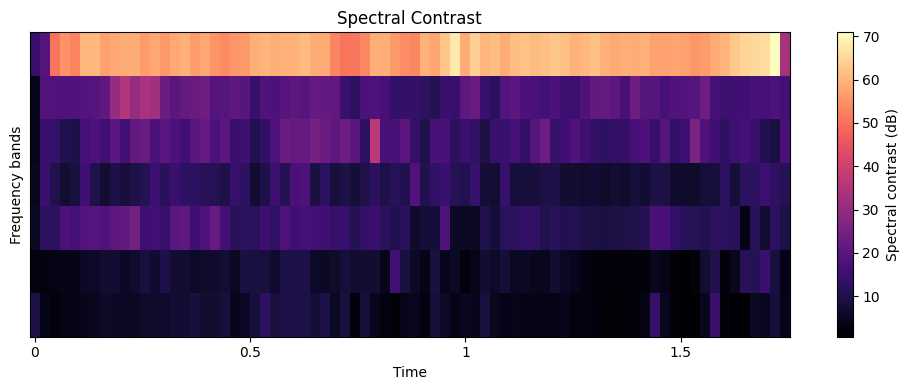

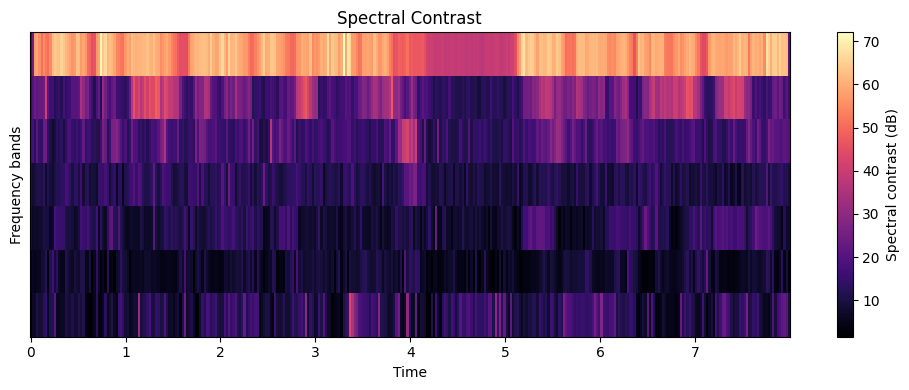

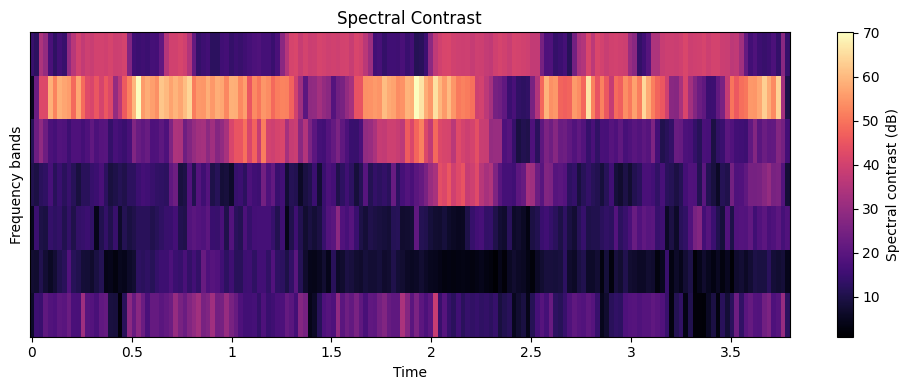

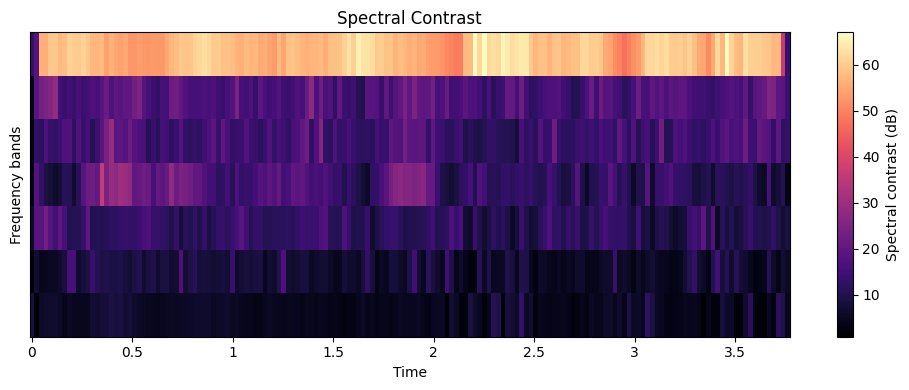

In [20]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # Spectral contrast 계산
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Spectral contrast 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar(label='Spectral contrast (dB)')
    plt.ylabel('Frequency bands')
    plt.title('Spectral Contrast')
    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()